In [2]:
import gym
from gym import envs
from gym import wrappers

import numpy as np
import sys
from collections import defaultdict

In [3]:
def epsilon_greedy_policy(Q, state, num_actions, epsilon):
    policy = np.ones(num_actions, dtype=float) * epsilon / num_actions
    best_action = np.argmax(Q[state])
    policy[best_action] += 1-epsilon
    return policy

In [26]:
def onpolicy_one_step(env, num_episodes, Q= defaultdict(lambda: np.zeros(env.action_space.n)), discount = 0.8):
    r = np.zeros(num_episodes)
    for i_episode in range(1,num_episodes+1):
        episode_reward = 0
        if (i_episode%1000)==0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        alpha = 0.3# 1-i_episode/num_episodes
        epsilon = (1-i_episode/num_episodes) ** 2
        state = env.reset()
        policy = epsilon_greedy_policy(Q, state, env.action_space.n, epsilon)
        action = np.random.choice(np.array(len(policy)), p=policy)
        while True:
            next_state, reward, done, _= env.step(action)
            policy = epsilon_greedy_policy(Q, next_state, env.action_space.n, epsilon)
            next_action = np.random.choice(np.array(len(policy)), p=policy)
            Q[state][action] = Q[state][action] + alpha * (reward + discount * Q[next_state][next_action] - Q[state][action])
            state = next_state; action = next_action;
            episode_reward += reward
            if done:
                break
        r[i_episode-1] = episode_reward
    return Q, r

In [27]:
env_name = 'FrozenLake-v0'
env = envs.make(env_name)
outdir = "/Users/jacopo/openaigym/project/TD/results/" + env_name + "2/"
#env = wrappers.Monitor(env, outdir, force=True)
#env.seed(0)
Q, rewards = onpolicy_one_step(env, 50000)

[2017-01-25 11:33:54,029] Making new env: FrozenLake-v0


Episode 50000/50000.

In [29]:
mean_rew = np.zeros(len(rewards)-100)
for i in range(len(mean_rew)):
    mean_rew[i] = np.mean(rewards[i:i+100])

<IPython.core.display.Javascript object>


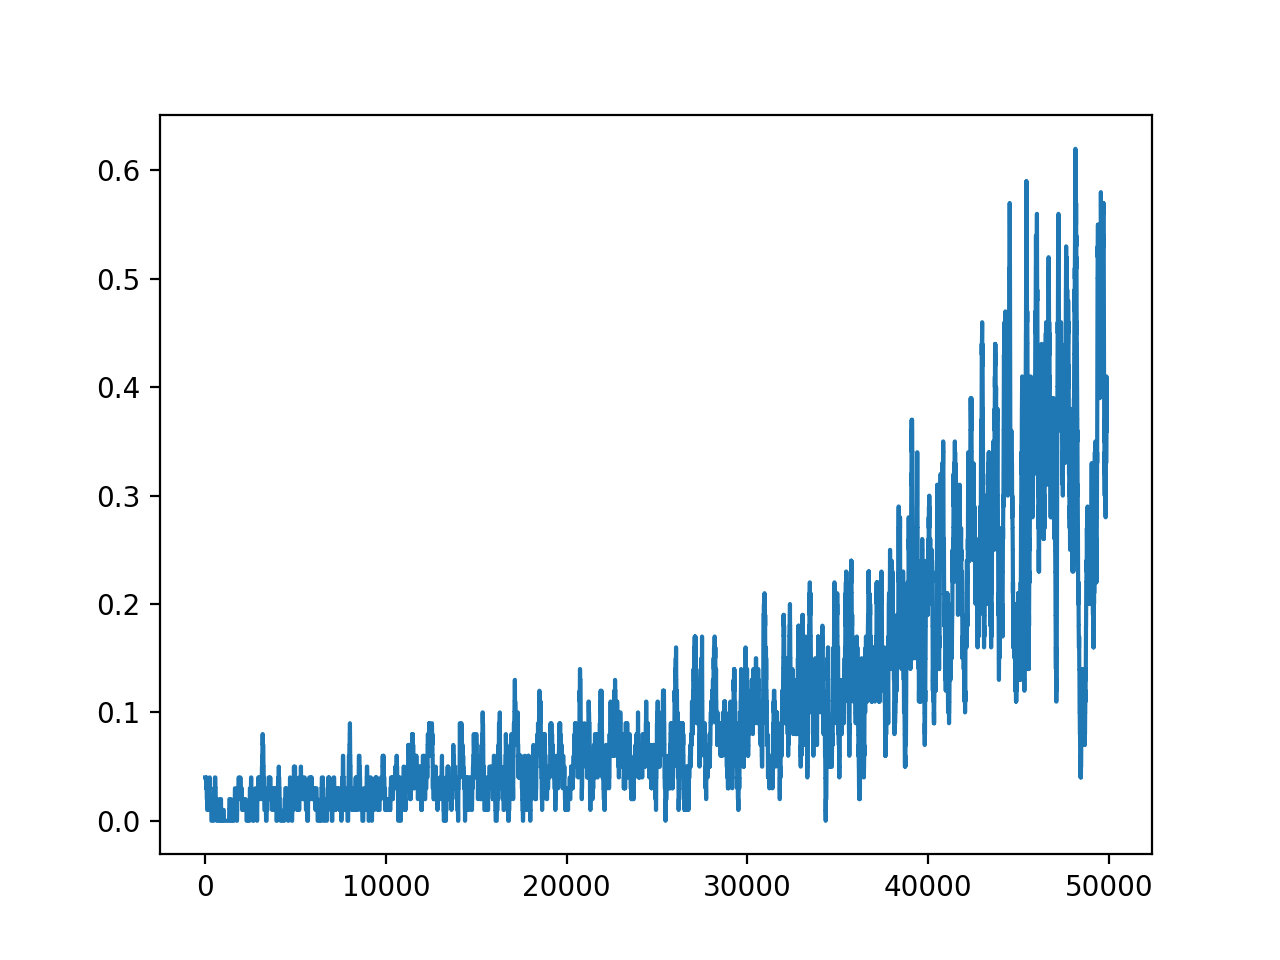

In [30]:
# Make a legend for specific lines.
import matplotlib.pyplot as plt
import numpy as np
fig1 = plt.figure()
x = np.arange(len(mean_rew))
l1, = plt.plot(x, mean_rew[x])

In [23]:
plt.show()

In [17]:
%matplotlib notebook

In [ ]:
gym.upload(outdir, api_key='sk_v7ktbUr7SzC68vXvnrwLLQ')